# TEST DIRAC

Test convolution method in spectrum class with a dirac function.

### Create dirac function and store in disk

In [1]:
import import_ipynb
from spectrum import Spectrum
from p_test import Parameters 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spectrum = Spectrum()
spectrum.load_spectrum("gaia_055000450000.txt")

spectrum_len = spectrum.flux.size
center_index = spectrum_len // 2
spectrum.flux = np.zeros(spectrum_len)
spectrum.flux[center_index] = 1.0

dirac_filename = "dirac_spectrum.txt"
np.savetxt(dirac_filename, np.column_stack((spectrum.wavelength, spectrum.flux)), header="Wavelength Flux")

print(f"Dirac spectrum saved to {dirac_filename}")
print(f"Run {dirac_filename} thorugh main program!")

Loading spectrum from gaia_055000450000.txt
Spectrum loaded correctly.
Dirac spectrum saved to dirac_spectrum.txt
Run dirac_spectrum.txt thorugh main program!


### After running through main program and storing in disk, overplot with gaussian.

Initializing default parameters


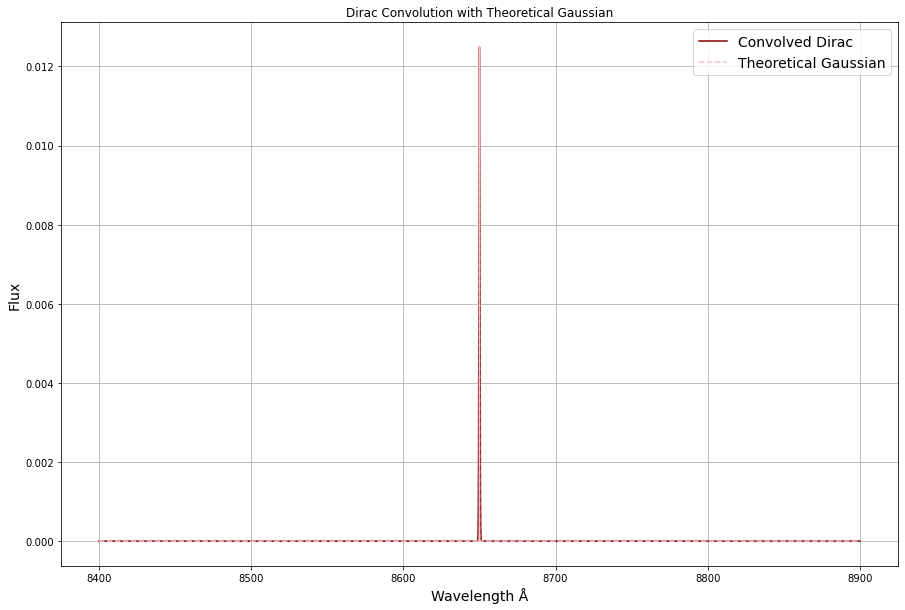

In [11]:
params = Parameters()

convolved_filename = "Dirac_spectrum_001.txt"
convolved_data = np.loadtxt(convolved_filename, skiprows=1)
convolved_wavelength = convolved_data[:, 0]
convolved_flux = convolved_data[:, 1]

#use same sigma as in main program
fwhm_wavelength = np.mean(convolved_wavelength) / params.resolving_power
sigma_wavelength = fwhm_wavelength / 2.355
lambda_step = np.mean(np.diff(convolved_wavelength))
sigma_pixels = sigma_wavelength / lambda_step


center_index = len(convolved_wavelength) // 2
gaussian_theory = np.zeros_like(convolved_wavelength)
gaussian_theory[center_index] = 1.0  

gaussian_theory *= lambda_step / (np.sqrt(2 * np.pi ) * sigma_wavelength) 

plt.figure(figsize=(15, 10))
plt.plot(convolved_wavelength, convolved_flux, label="Convolved Dirac", color="maroon", linewidth=1.5)
plt.plot(convolved_wavelength, gaussian_theory, label="Theoretical Gaussian", color="pink", linestyle="--", linewidth=1.5)
plt.xlabel("Wavelength Å", fontsize=14)
plt.ylabel("Flux", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.title("Dirac Convolution with Theoretical Gaussian")
plt.show()